In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(anndata))
library(ggplot2)
library(pheatmap)
library(RColorBrewer)

source("/projects/ps-renlab2/y2xie/scripts/basics.R")
source("/projects/ps-renlab2/y2xie/scripts/DPT_help.R")
source("/projects/ps-renlab2/y2xie/scripts/DPT/BICAN_help.R")

library(repr)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [ ]:
suppressPackageStartupMessages(library(GenomicRanges))
suppressPackageStartupMessages(library(InteractionSet))
suppressPackageStartupMessages(library(VariantAnnotation))
suppressPackageStartupMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressPackageStartupMessages(library(SNPlocs.Hsapiens.dbSNP150.GRCh38))
suppressPackageStartupMessages(library(motifbreakR))
library(MotifDb)
library(TFBSTools)

In [4]:
cols <- read.csv("./ref/yel_Science2023_supp/subclass_celltype_match.csv")
tmp <- distinct(cols[,c("Cell.class", "Cell.class.color")])
ccol1 <- tmp$Cell.class.color
names(ccol1) <- gsub("GLUT", "Glut", tmp$Cell.class)

tmp <- read.csv("./analysis/04.clustering/subclass_corrected.color.csv", row.names = 1)
ccol2 <- tmp$color
names(ccol2) <- tmp$MiniAtlas

In [5]:
corder <- read.table("./analysis/04.clustering/order.subclass.250601", sep = "\t") %>% dplyr::select(V1) %>% unlist %>% as.character
corder2 <- read.table("./analysis/04.clustering/order.cluster.250601", sep = "\t") %>% dplyr::select(V1) %>% unlist %>% as.character

In [69]:
rpkm <- read.table("./analysis/04.clustering/02.RNA/MiniAtlas_RNA_merged_dual_filt_clean_250724.subclass.rpkm.txt", row.names = 1, header = T, check.names = F)
dim(rpkm)

[1] 38369    35

In [71]:
rmeta <- read.csv("./analysis/04.clustering/02.RNA/03.l3_clustering/MiniAtlas_RNA_merged_dual_filt_clean_corrected_250722_metadata.txt", sep = '\t')
gaba <- rmeta %>% filter(class == "GABA") %>% dplyr::select(subclass_corrected) %>% unlist %>% unique %>% as.character
glut <- rmeta %>% filter(class == "Glut") %>% dplyr::select(subclass_corrected) %>% unlist %>% unique %>% as.character
nonn <- rmeta %>% filter(class == "NonN") %>% dplyr::select(subclass_corrected) %>% unlist %>% unique %>% as.character

## Read input data

In [7]:
chmm <- readRDS("./analysis/10.chromhmm/output/DNAme_hyperCGN/annotation/hba.whole.union.peaks.annotation.rds")

In [5]:
abcif <- read.table("./analysis/08.conns/plot/broad_abc_filtcelltype_conns.txt", header = T)
abcif %>% dplyr::select(range, TargetGene) %>% distinct %>% nrow

[1] 264132

In [6]:
abcif3 <- read.table("./analysis/08.conns/plot/broad_abc_filtcelltype_select_conns.txt", header = T)
abcif3 %>% dplyr::select(range, TargetGene) %>% distinct %>% nrow

[1] 200007

## Check ABC overlap with finemapped variants

In [22]:
list.files("finemapped_results/")

[1] "Barban.NatGenet.2016.Age_First_Birth"                           
 [2] "Deary.MolPsychiatry.2017.Tiredness"                             
 [3] "Demontis.NatGenet.2019.Attention_Deficit_Hyperactivity_Disorder"
 [4] "denHoed.NatGenet.2013.Heart_Rate"                               
 [5] "EAGLE.AmJMedGenet.2016.Childhood_Aggression"                    
 [6] "gchromvar"                                                      
 [7] "Grove.NatGenet.2019.Autism_Spectrum_Disorder"                   
 [8] "Horikoshi.Nature.2016.Birth_Weight"                             
 [9] "IMSGC.Science.2019.Multiple_sclerosis"                          
[10] "Jansen.2019.NatGenet.Insomnia"                                  
[11] "Jansen.NatGenet.2019.Alzheimers_Disease"                        
[12] "Jones.PLOSGen.2016.Chronotype"                                  
[13] "Jones.PLOSGen.2016.Sleep_Duration"                              
[14] "Kemp.NatGenet.2017.Heel_bone_mineral_density"                   
[15] "Kilpelainen.NatCommun.2016.Leptin"                              
[16] "Luciano.NatGenet.2017.Neuroticism"                              
[17] "Malik.2018.NatGenet.Stroke"                                     
[18] "Nalls.LancetNeurol.2019.Parkinsons_disease"                     
[19] "Nielson.2018.NatGenet.Atrial_Fibrillation"                      
[20] "nohup.out"                                                      
[21] "Okbay.Nature.2016.Educational_Attainment"                       
[22] "Palmer.MolPsych.2021.problematic_opioid_use"                    
[23] "PGC.MolPsychiatry.2017.Obsessive_Compulsive_Disorder"           
[24] "PGC.MolPsychiatry.2017.Post_Traumatic_Stress_Disorder"          
[25] "PGC.Nature.2014.Schizophrenia"                                  
[26] "SAIGE.UKBB.2018.Tobacco_use_disorder"                           
[27] "Savage.NatGenet.2018.Intelligence"                              
[28] "Schumann.PNAS.2016.Alcohol_Usage"                               
[29] "Shadrina.PLoSGenet.2019.Varicose_veins"                         
[30] "Stahl.2018.biorxiv.Bipolar_Disorder"                            
[31] "Taal.NatGenet.2012.Head_Circumference"                          
[32] "Teumer.Diabetes.2016.Microalbuminuria"                          
[33] "Teumer.NatCommun.2018.Thyroid_stimulating_hormone"              
[34] "unMapped"                                                       
[35] "vandenBerg.BehavGenet.2016.Extraversion"                        
[36] "vanderValk.HumMolGenet.2014.Birth_Length"                       
[37] "vanRheenen.NatGenet.2016.Amyotrophic_Lateral_Sclerosis"         
[38] "Watanabe.NatGenet.2019.Diastolic_blood_pressure"                
[39] "Watanabe.NatGenet.2019.Pulse_rate"                              
[40] "Watanabe.NatGenet.2019.Systolic_blood_pressure"                 
[41] "Watson.2018.NatGenet.Anorexia_Nervosa"                          
[42] "Wray.biorxiv.2018.Major_Depressive_Disorder"                    
[43] "Yengo.biorxiv.2018.Height"                                      
[44] "Zhu.RespirRes.2019.Hypertension"

In [106]:
## Perform overlap with all trait and all abc links.
### retain info: bedpe, ac signal, gene signal, snp id, trait name
tmp <- abcif %>% select(chr,start,end) %>% distinct
abcrange <- GRanges(tmp[,1], ranges = IRanges(as.integer(tmp[,2]), as.integer(tmp[,3])))

qtable <- list()
for (qtrait in list.files("finemapped_results/")){
    qfile <- paste0("finemapped_results/", qtrait, "/", qtrait, "_posteriors.bed.hg38.bed")
    if (file.exists(qfile)){
        qfinemap <- read.table(qfile, header = F)
        qrange <- GRanges(qfinemap[,1], ranges = IRanges(as.integer(qfinemap[,2]), as.integer(qfinemap[,3])), 
                          rsid = qfinemap[,4], pp = qfinemap[,5])
        tmp <- findOverlapPairs(abcrange, qrange) %>% as.data.frame 
        if(nrow(tmp) > 0){
            tmp <- tmp %>%
            select(first.seqnames,first.start,first.end, second.X.rsid,second.X.pp) %>%
            setNames(c("chr", "start", "end", "rsid", "pp")) %>% 
            mutate(trait = qtrait)
            qtable[[qtrait]] <- merge(tmp, abcif, by = c("chr", "start", "end")) %>%
            select(chr,start,end , TargetGeneTSS, TargetGene, normalized_h3k27ac_enh, TargetGeneExpression, ABC.Score, CellType, trait, rsid, pp)
        }
    }
}

qtable <- do.call(rbind, qtable)


In [110]:
write.table(qtable, "broad_abc_filtcelltype_conns_ovlp_w_finemap_hg38.txt", 
            sep = "\t", quote = F, row.names = F, col.names = T)

## Write variants id for motifbreakR

In [627]:
qbed <- list()
for (qtrait in list.files("finemapped_results/")){
    qfile <- paste0("finemapped_results/", qtrait, "/", qtrait, "_posteriors.bed")
    if (file.exists(qfile)){
        qfinemap <- read.table(qfile, header = F)
        qbed[[qtrait]] <- qfinemap[,1:4] %>% distinct
    }
}

qbed <- do.call(rbind, qbed) %>% distinct
qbed %>% nrow
qbed2 <- qbed %>% filter(V4 %in% unique(qtable$rsid)) %>% distinct
qbed2 %>% nrow

[1] 44095

[1] 1705

In [628]:
write.table(qbed2, "broad_abc_filtcelltype_conns_ovlp_w_finemap_hg19.snp.bed", 
            sep = "\t", quote = F, row.names = F, col.names = F)

In [ ]:
### sanity check of coordinates:
snps <- read.table("broad_abc_filtcelltype_conns_ovlp_w_finemap_hg19.snp.bed")
snps.mb <- snps.from.rsid(rsid = snps$V4, dbSNP = SNPlocs.Hsapiens.dbSNP150.GRCh38, search.genome = BSgenome.Hsapiens.UCSC.hg38)
snps.df <- snps.mb %>% as.data.frame

In [84]:
head(snps.df)

,seqnames,start,end,width,strand,SNP_id,REF,ALT
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
rs10008032,chr4,38743861,38743861,1,*,rs10008032,T,C
rs10010758,chr4,37936897,37936897,1,*,rs10010758,T,C
rs1002226,chr11,17384070,17384070,1,*,rs1002226,C,T
rs10022648,chr4,145930633,145930633,1,*,rs10022648,A,G
rs1004301,chr2,215145667,215145667,1,*,rs1004301,C,T
rs1004873,chr19,8154949,8154949,1,*,rs1004873,A,G


## Summarize finemapped results

In [7]:
qtrait <- c("ASD_SPARK_EUR_iPSYCH_PGC.Nature.2025.Autism",
            "Demontis.NatGenet.2019.Attention_Deficit_Hyperactivity_Disorder",
            "IMSGC.Science.2019.Multiple_sclerosis",
            "Jansen.2019.NatGenet.Insomnia",
            "Jansen.NatGenet.2019.Alzheimers_disease",
            "Jones.PLOSGen.2016.Chronotype",
            "Luciano.NatGenet.2017.Neuroticism",
            "Nalls.LancetNeurol.2019.Parkinsons_disease",
            "Okbay.Nature.2016.Educational_Attainment",
            "Palmer.MolPsych.2021.problematic_opioid_use",
            "PGC.Nature.2014.Schizophrenia",
            "SAIGE.UKBB.2018.Tobacco_use_disorder",
            "Savage.NatGenet.2018.Intelligence",
            "Stahl.2018.biorxiv.Bipolar_Disorder",
            "vanRheenen.NatGenet.2016.Amyotrophic_Lateral_Sclerosis",
            "Watson.2018.NatGenet.Anorexia_Nervosa",
            "Malik.2018.NatGenet.Stroke")
length(qtrait)

[1] 17

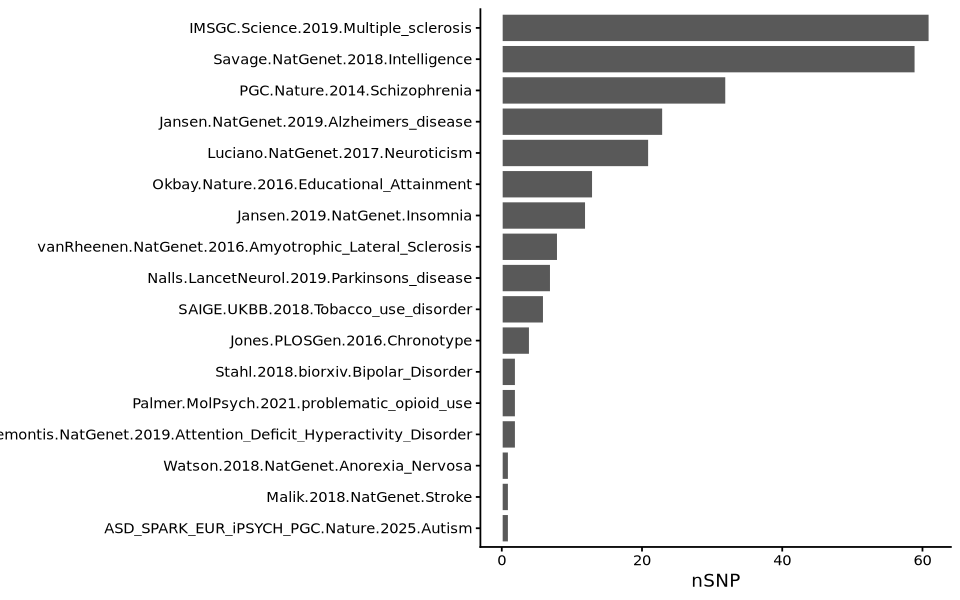

In [20]:
fig1 <- qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
select(rsid, range, TargetGene, CellType, trait) %>% 
distinct %>% group_by(trait) %>%
summarise(nSNP = n_distinct(rsid), nRange = n_distinct(range), 
          nGene = n_distinct(TargetGene), nCelltype = n_distinct(CellType)) %>%
ungroup() %>%
arrange(nSNP) %>% 
mutate(trait = factor(trait, levels = trait)) %>%
ggplot(aes(y = trait, x = nSNP)) + 
geom_col(color = "white") + 
theme_classic() + ylab("")

options(repr.plot.width = 8, repr.plot.height = 5)
fig1

In [21]:
### arrange trait
torder <- levels(fig1$data$trait)

In [31]:
qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
select(rsid, range, TargetGene, CellType, trait, pp) %>% 
distinct %>% 
group_by(trait) %>%
summarise(nSNP = n_distinct(rsid), nRange = n_distinct(range), nGene = n_distinct(TargetGene), 
          nCelltype = n_distinct(CellType)) %>%
ungroup() %>% summary

    trait                nSNP        nRange          nGene       
 Length:17          Min.   : 1   Min.   : 1.00   Min.   :  1.00  
 Class :character   1st Qu.: 2   1st Qu.: 2.00   1st Qu.: 10.00  
 Mode  :character   Median : 7   Median : 6.00   Median : 16.00  
                    Mean   :15   Mean   :14.53   Mean   : 31.71  
                    3rd Qu.:21   3rd Qu.:21.00   3rd Qu.: 35.00  
                    Max.   :61   Max.   :59.00   Max.   :124.00  
   nCelltype    
 Min.   : 1.00  
 1st Qu.: 5.00  
 Median :23.00  
 Mean   :18.53  
 3rd Qu.:28.00  
 Max.   :28.00  

`summarise()` has grouped output by 'trait'. You can override using the `.groups` argument.


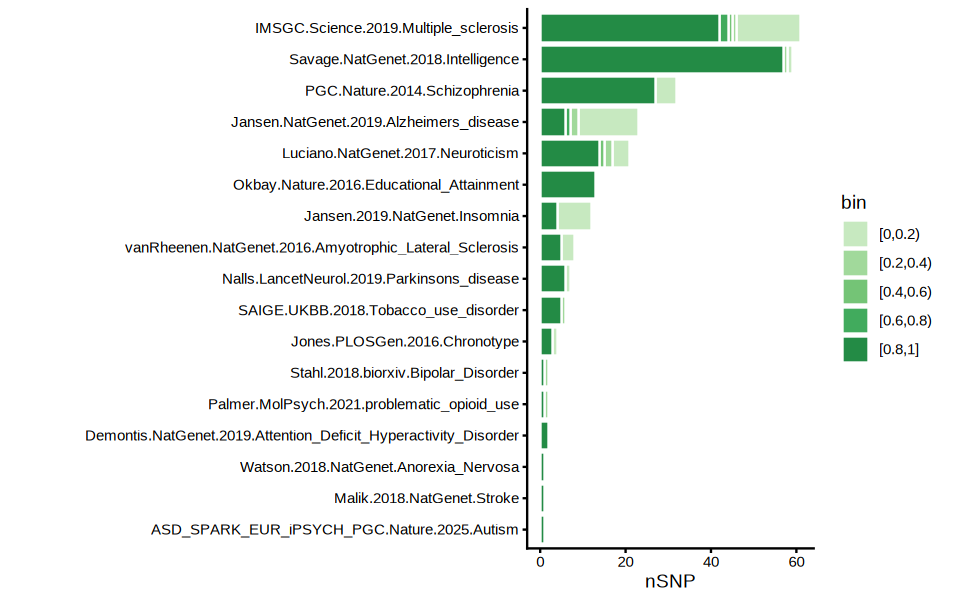

In [26]:
fig2 <- qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
select(rsid, range, TargetGene, CellType, trait, pp) %>% 
distinct %>% 
mutate(bin = cut(pp, breaks = seq(0, 1, by = 0.2), include.lowest = TRUE, right = FALSE)) %>%
group_by(trait, bin) %>%
summarise(nSNP = n_distinct(rsid), nRange = n_distinct(range), nGene = n_distinct(TargetGene), 
          nCelltype = n_distinct(CellType)) %>%
ungroup() %>%
mutate(trait = factor(trait, levels = torder)) %>%
ggplot(aes(y = trait, x = nSNP, fill = bin)) + 
geom_col(color = "white", position = "stack") + 
theme_classic() + ylab("") + 
scale_fill_manual(values = colorRampPalette(brewer.pal(n = 8, name = "Greens"))(8)[3:8])

options(repr.plot.width = 8, repr.plot.height = 5)
fig2

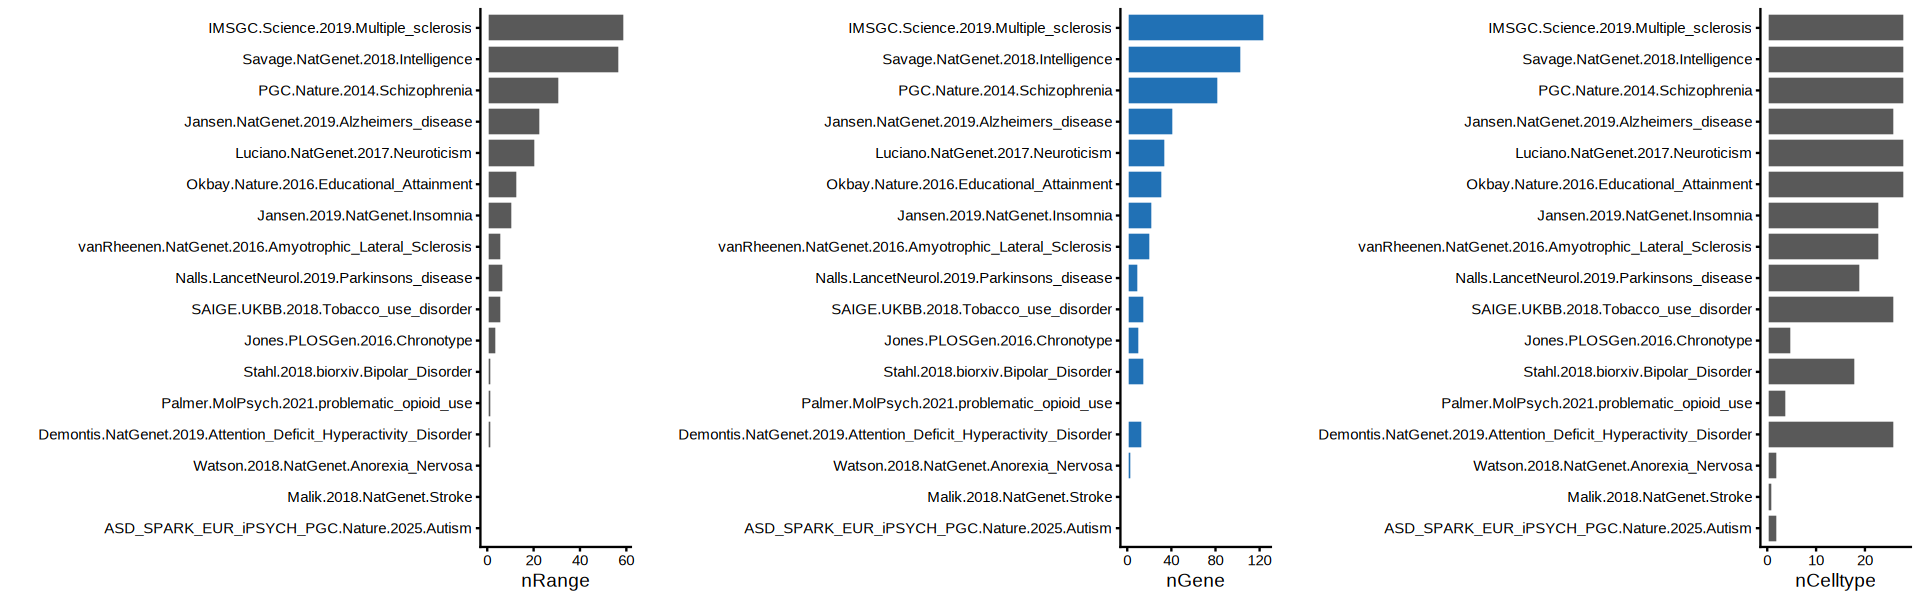

In [33]:
### Plot nRange and nGene color with chromatin states / expression
t1 <- qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
group_by(trait) %>%
summarise(nSNP = n_distinct(rsid), nRange = n_distinct(range), nGene = n_distinct(TargetGene), 
          nCelltype = n_distinct(CellType)) %>%
ungroup() %>%
mutate(trait = factor(trait, levels = torder)) %>%
ggplot(aes(y = trait, x = nRange)) + 
geom_col(color = "white") + 
theme_classic() + ylab("") + 
scale_fill_manual(values = colorRampPalette(brewer.pal(n = 8, name = "Blues"))(8)[c(3, 7)]) + 
NoLegend()

t2 <- qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
group_by(trait) %>%
summarise(nSNP = n_distinct(rsid), nRange = n_distinct(range), nGene = n_distinct(TargetGene), 
          nCelltype = n_distinct(CellType), 
          expressed = as.integer(any(TargetGeneExpression > 1, na.rm = TRUE))) %>%
ungroup() %>%
mutate(trait = factor(trait, levels = torder)) %>%
ggplot(aes(y = trait, x = nGene, fill = as.character(expressed))) + 
geom_col(color = "white") + 
theme_classic() + ylab("") + 
scale_fill_manual(values = colorRampPalette(brewer.pal(n = 8, name = "Blues"))(8)[c(3, 7)]) + 
NoLegend()

t3 <- qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
group_by(trait) %>%
summarise(nSNP = n_distinct(rsid), nRange = n_distinct(range), nGene = n_distinct(TargetGene), 
          nCelltype = n_distinct(CellType)) %>%
ungroup() %>%
mutate(trait = factor(trait, levels = torder)) %>%
ggplot(aes(y = trait, x = nCelltype)) + 
geom_col(color = "white") + 
theme_classic() + ylab("")

options(repr.plot.width = 16, repr.plot.height = 5)
fig3 <- cowplot::plot_grid(t1, t2, t3, ncol = 3)

fig3 

In [38]:
### Detailed gene example
tmp <- qtable %>% filter(trait %in% qtrait) %>%
mutate(range = paste0(chr, ":", start, "-", end)) %>%
select(TargetGene, trait) %>% 
distinct 

write.table(tmp, "trait_gene.xls", sep = "\t", quote = F, row.names = T, col.names = T)

## Align with LDSC

In [52]:
qstate <- "E8"
glist <- list()
for (f in list.files(paste0("../14.ldsc/partition/", qstate, "/"), pattern = ".*.cell_type_results.txt")){
    fname <- gsub(".cell_type_results.txt", "", f)
    glist[[fname]] <- read.table(paste0("../14.ldsc/partition/", qstate, "/", f), header = T) %>% 
    mutate(group = fname, celltype = Name)
}
glist <- glist[!duplicated(tolower(names(glist)))]

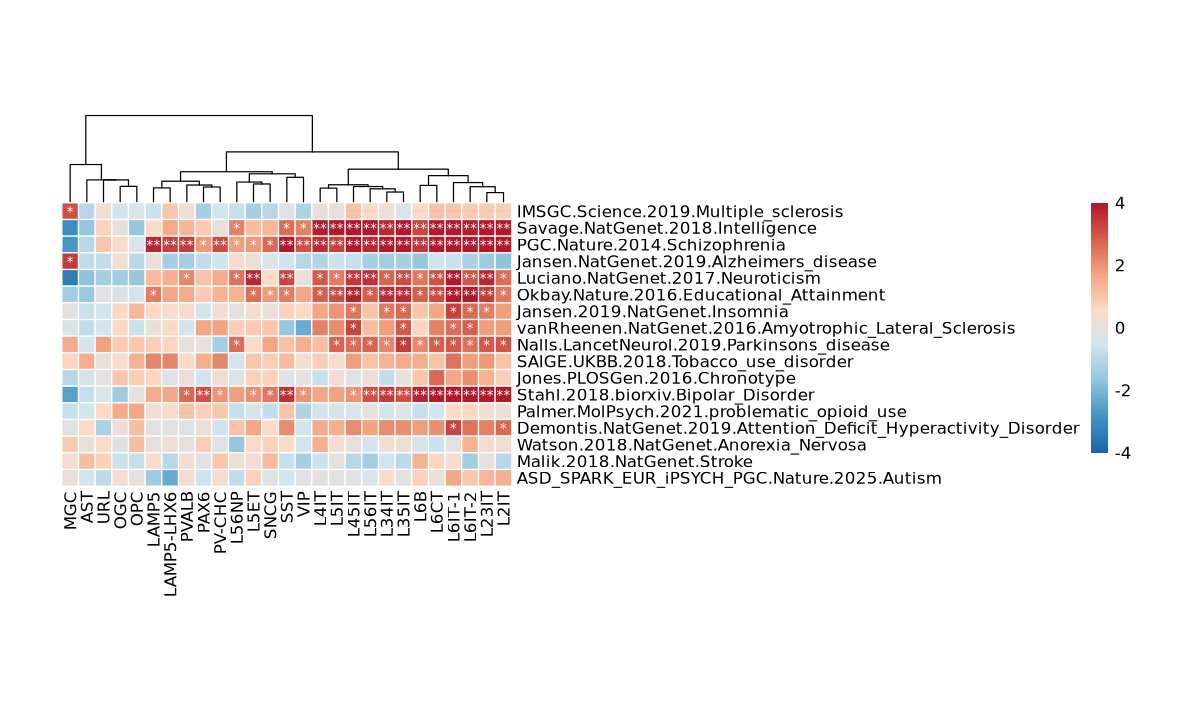

In [43]:
badcelltype <- c('IMMUNE' ,'ENDO', 'FBL', 'SST-CHODL') ### from chromatin states!
qmtx <- do.call(rbind, glist) %>% 
filter(group %in% qtrait, !(Name %in% badcelltype)) %>%
group_by(group) %>%
mutate(FDR = p.adjust(Coefficient_P_value, method = "fdr")) %>%
ungroup %>%
mutate(score = Coefficient / Coefficient_std_error)

mtx <- qmtx %>% 
reshape2::dcast(celltype ~ group, value.var = "score") %>%
tibble::column_to_rownames("celltype")

tmp <- qmtx %>% 
reshape2::dcast(celltype ~ group, value.var = "FDR") %>%
tibble::column_to_rownames("celltype")
tmp[is.na(tmp)] <- 1
lmat <- ifelse(tmp < 0.005, "**", ifelse(tmp < 0.05,  "*", " "))

options(repr.plot.width = 10, repr.plot.height = 6)
fig4 <- mtx[, intersect(rev(torder), colnames(tmp))] %>% t %>% 
pheatmap(cluster_rows = F, border_color = "white", number_color = "white", 
         display_number = t(lmat[, intersect(rev(torder), colnames(tmp))]),
         angle_col = 90, cellwidth = 10, cellheight = 10, breaks = seq(-4, 4, 0.08),
         color = colorRampPalette(rev(brewer.pal(n = 8, name = "RdBu")))(100))

## Summarize deep learning prediction

Warning message:
“ggrepel: 57 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


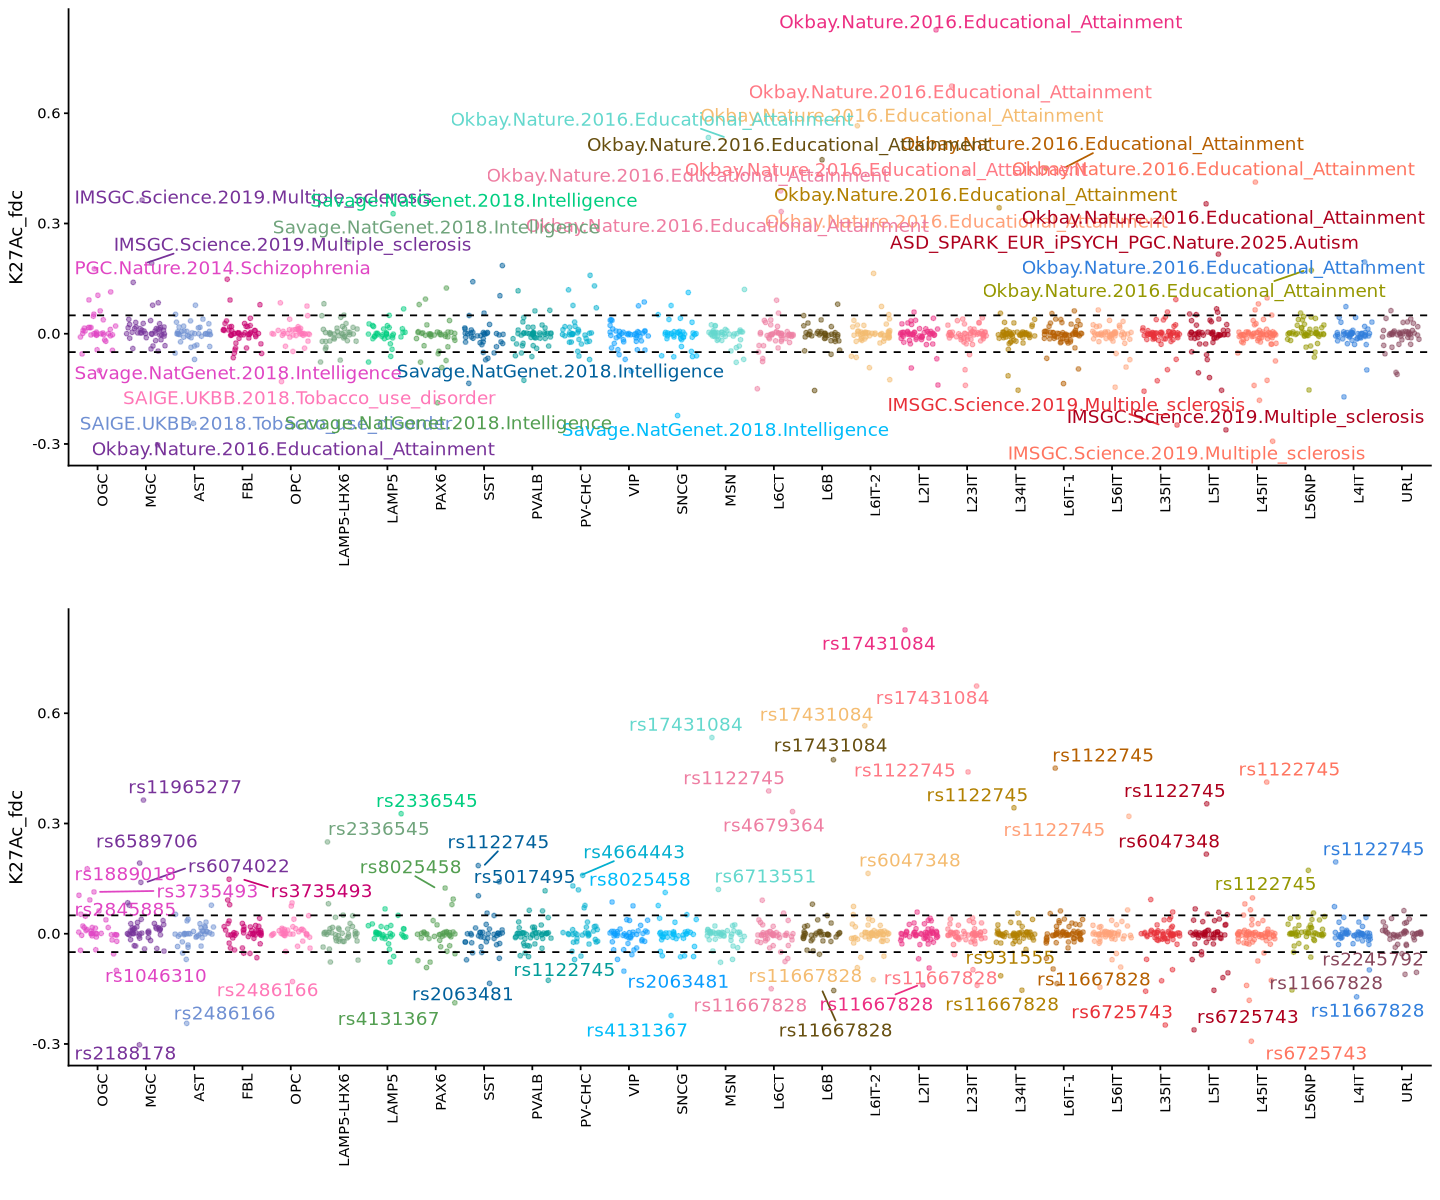

In [8]:
qpredict <- read.table("broad_abc_filtcelltype_conns_ovlp_w_finemap_hg38.with_fold_changes.txt", sep = '\t', header = T)

### focused only on neuropsychiatric disease
t1 <- qpredict %>% filter(pp >= 0.1) %>%
filter(trait %in% qtrait) %>% 
mutate(CellType = factor(CellType, levels = corder)) %>% 
select(trait, rsid, CellType, K27Ac_fdc) %>% distinct %>%
mutate(label = ifelse(abs(K27Ac_fdc) >= 0.1, trait, "")) %>%
ggplot(aes(x = CellType, y = K27Ac_fdc, color = CellType, label = label)) + 
geom_jitter(alpha = 0.5, size = 1) + xlab("") + 
ggrepel::geom_text_repel() + 
geom_hline(yintercept =  0.05, linetype = "dashed") + 
geom_hline(yintercept = -0.05, linetype = "dashed") + 
theme_classic() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_color_manual(values = ccol2) + NoLegend()

t2 <- qpredict %>% filter(pp >= 0.1) %>%
filter(trait %in% qtrait) %>% 
mutate(CellType = factor(CellType, levels = corder)) %>% 
select(trait, rsid, CellType, K27Ac_fdc) %>% distinct %>%
mutate(label = ifelse(abs(K27Ac_fdc) >= 0.1, rsid, "")) %>%
ggplot(aes(x = CellType, y = K27Ac_fdc, color = CellType, label = label)) + 
geom_jitter(alpha = 0.5, size = 1) + xlab("") + 
ggrepel::geom_text_repel() + 
geom_hline(yintercept = 0.05, linetype = "dashed") + 
geom_hline(yintercept = -0.05, linetype = "dashed") + 
theme_classic() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_color_manual(values = ccol2) + NoLegend()

fig1 <- cowplot::plot_grid(t1, t2, nrow = 2, align = "v")

options(repr.plot.width = 12, repr.plot.height = 10)
fig1

### Run motifbreakR on all finemapped variants

In [ ]:
snps <- read.table("broad_abc_filtcelltype_conns_ovlp_w_finemap_hg19.snp.bed") %>%
mutate(V5 = "0", V6 = "+") 

snps.mb <- snps.from.rsid(rsid = snps$V4, dbSNP = SNPlocs.Hsapiens.dbSNP150.GRCh38, search.genome = BSgenome.Hsapiens.UCSC.hg38)

In [ ]:
qdts <- subset(MotifDb, dataSource %in% c("HOCOMOCOv11-core-A", "HOCOMOCOv11-core-B", "HOCOMOCOv11-core-C", ### human specific
                                          "jaspar2022", "jaspar2024"))
results <- motifbreakR(
      snpList     = snps.mb,
      pwmList     = qdts,
      filterp    = TRUE,
      threshold  = 1e-4,
      method     = "ic",
      bkg        = c(A=0.25, C=0.25, G=0.25, T=0.25),
      show.neutral = FALSE,
      BPPARAM = BiocParallel::MulticoreParam(workers = 8))

In [93]:
saveRDS(results, "broad_abc_filtcelltype_conns_ovlp_w_finemap_hg38.snp.motifbreakR.rds")